# ML lab 03 Practice

---

# Minimizing Cost

> YouTube Lecture: [link](https://www.youtube.com/watch?v=Y0EF9VqRuEA&feature=youtu.be)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


%matplotlib inline

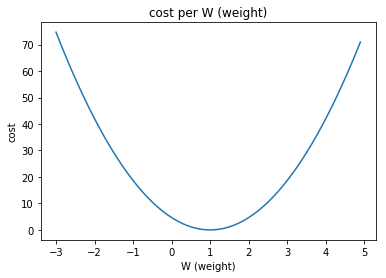

In [2]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
# Out hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1  # W 범위: -3 ~ 5
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# Show the cost function
plt.plot(W_val, cost_val)  # X축: W, Y축: cost
plt.title('cost per W (weight)')
plt.xlabel('W (weight)')
plt.ylabel('cost')
plt.show()

위의 함수 그래프는 Convex Function 에 해당된다.  
(Gradient Descent Algorithm 시작점의 위치에 상관없이 동일한 최저점을 반환)

## Gradient Descent (Full Code)

Cost Function 을 W 에 대해 직접 편미분한 뒤 Gradient Descent Algorithm 직접 구현  
(Bias 고려 X)

In [20]:
import tensorflow as tf


x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# H(x) = Wx + b 에서 H(x) = Wx 로 단순화
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative (도함수)
learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session
sess = tf.Session()
# initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for step in range(15):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.13835926 [1.0994123]
1 0.03935547 [1.0530199]
2 0.011194442 [1.0282773]
3 0.0031841823 [1.0150812]
4 0.000905723 [1.0080433]
5 0.00025763 [1.0042897]
6 7.328055e-05 [1.0022879]
7 2.0845331e-05 [1.0012202]
8 5.9284384e-06 [1.0006508]
9 1.6870617e-06 [1.0003471]
10 4.7996656e-07 [1.0001851]
11 1.3639828e-07 [1.0000987]
12 3.8868052e-08 [1.0000527]
13 1.1080829e-08 [1.0000281]
14 3.1585614e-09 [1.000015]


## Gradient Descent (Full Code)

> Use `tf.train.GradientDescentOptimizer`

In [19]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Intializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(10+1):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0


## Gradient Descent (Full Code)

> Optional: `compute_gradient` and `apply_gradient`

In [23]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost)
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session
sess = tf.Session()
# Intializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)